# PROJECT ID: PTID-CDS-JUL-23-1576

# PRCP-1012-GameWinnerPred

# Problem Statement



Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game. 
 


# Importing Basic Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


## Store the training data and use memory saving function to reduce memory usage

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')
 
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
data=pd.read_csv('pubg.csv')
data= reduce_mem_usage(data)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)


In [6]:
#print first rows of data
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875


In [7]:
#print lat 5 rows of data
data.tail(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000000,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.000000,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150002,0,0,0,69,...,0,0.0,0,0.000,0,0,81.699997,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060001,0,0,0,66,...,0,0.0,0,2.184,0,0,788.700012,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.399994,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.000000,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.000000,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.000000,5,0,0.5464


## Basic Checks

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
data.shape

(4446966, 29)

- INFERENCE:- WE HAVE A DATASET WITh 4446966 ROWS and 29 columns

## Checking The Misssing Values

In [8]:
#checking the missing values
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [9]:
data.isnull().sum().sum()

1

- INFERANCE: So from the output,we can conclude that number of column has null values except 'winPlaceperc'

In [10]:
#Taking care of duplicate values
data_dup = data.duplicated().any()

In [13]:
data_dup

False

- INFERANCE :They have no duplicate values

# Domain Analysis

- 1. Id
- 2. groupId
- 3. matchId
- 4. assists
- 5. boosts
- 6. damageDealt
- 7. DBNOs
- 8. headshotKills
- 9. heals
- 10. killPlace
- 11. killPoints
- 12. kills
- 13. killStreaks
- 14. longestKill
- 15. matchDuration
- 16. matchType
- 17.maxPlace
- 18. maxPlace
- 19. rankPoints
- 20. revives
- 21. rideDistance
- 22. roadKills
- 23. swimDistance
- 24. teamKills
- 25. vehicleDestroys
- 26. walkDistance
- 27. weaponsAcquired
- 28. winPoints
- 29. winPlacePerc



## EDA(Explotary Data Analysis)

- As we are getting some information from each feature so let's see how statistically the dataset is spread

In [11]:
#Statistical measures about the data
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


# The Killers 

In [12]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(data['kills'].mean(),data['kills'].quantile(0.99), data['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


## Let's Plot The Kill Counts.

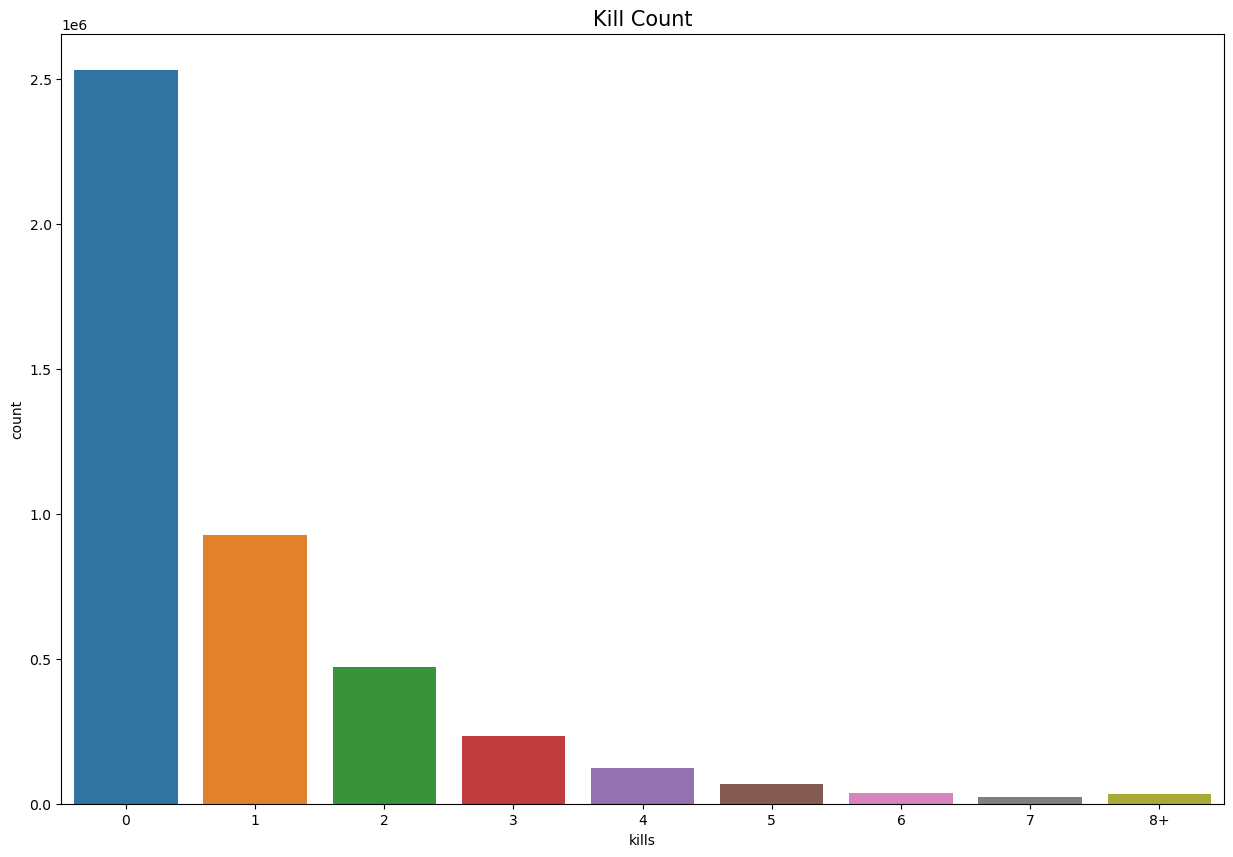

In [13]:
data = data.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

- INFERANCE: - Most people can't make a single kill

# Let's Check Anyone Can Do Damage

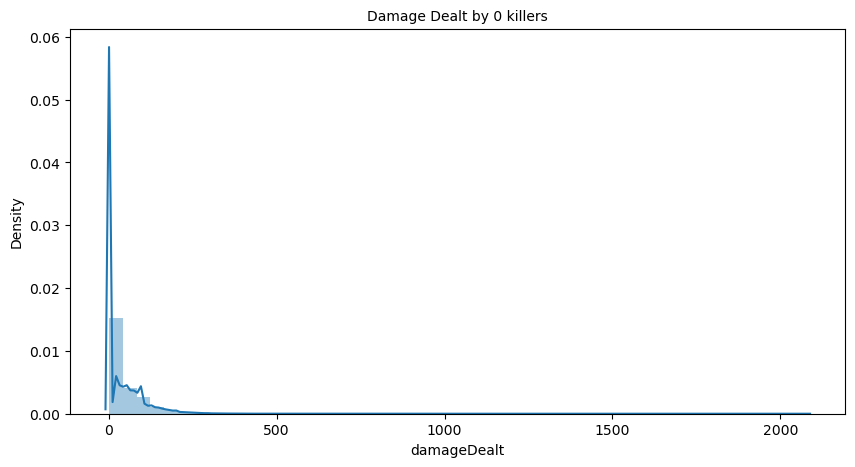

In [14]:
data = data.copy()
data = data[data['kills']==0]
plt.figure(figsize=(10,5))
plt.title("Damage Dealt by 0 killers",fontsize=10)
sns.distplot(data['damageDealt'])
plt.show()

- INFERANCE: - Well,Most of them don't

# Let's Check The Exceptions

In [15]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(data)))

data1= data[data['damageDealt']==0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(data)))

16666 players (0.6588%) have won without a single kill!
4709 players (0.1861%) have won without dealing damage!


- Here we can know the players have won without a single kill,And have won without dealing damage

# Plot Win Placement Percentage Vs Kills

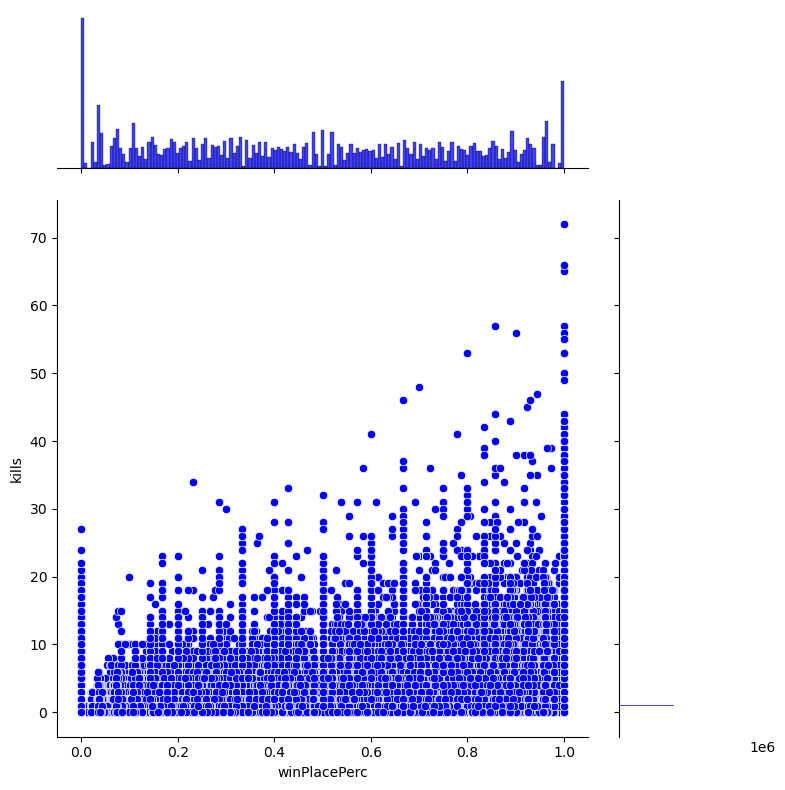

In [8]:
sns.jointplot(x="winPlacePerc", y="kills", data=data,height=8,ratio=3,color="b")
plt.show()

- INFERANCE: Apparentrly killing has a correlation with winning

## Apparentrly killing has a correlation with winning. Finally let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).



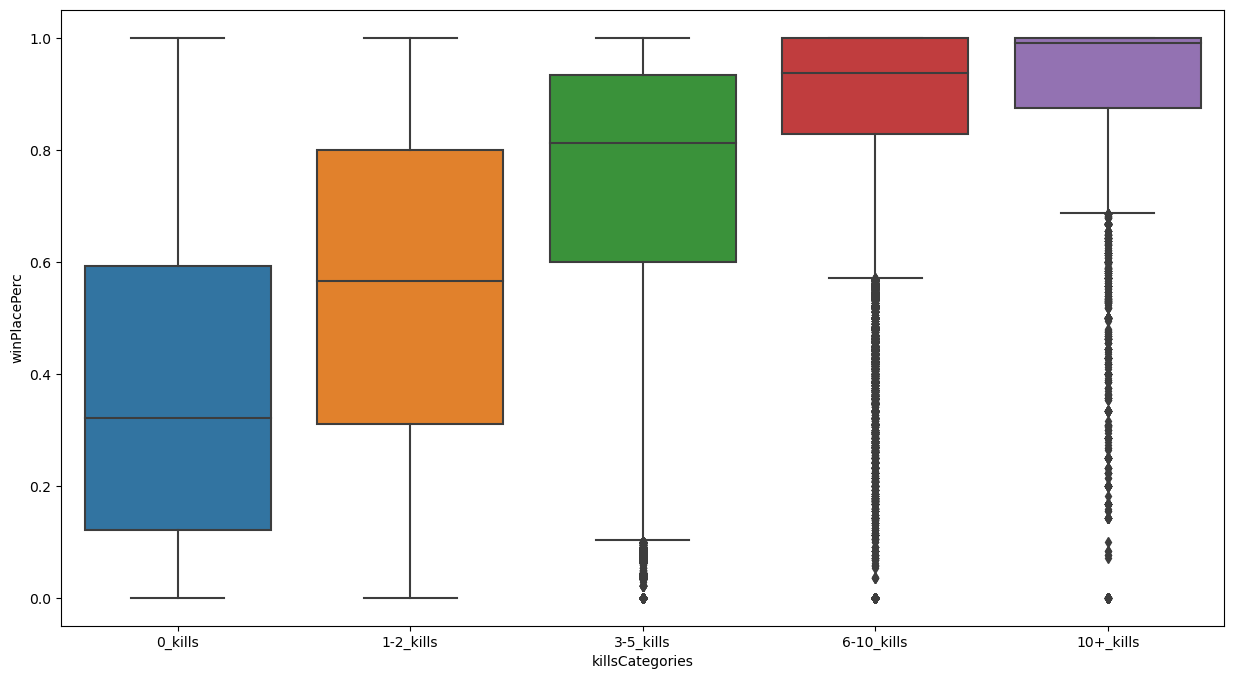

In [87]:
kills = data.copy()

kills['killsCategories'] = pd.cut(kills['kills'],[-1,0,2,5,10,60],labels=['0_kills','1-2_kills','3-5_kills','6-10_kills','10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories",y="winPlacePerc",data=kills)
plt.show()

- INFERANCE: Most of the people in the above graph have zero kills.

# The Runners

In [16]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(data['walkDistance'].mean(), data['walkDistance'].quantile(0.99), data['walkDistance'].max()))


The average person walks for 822.9m, 99% of people have walked 4032.0m or less, while the marathoner champion walked for 25780.0m.


- Here will show that different persons are walking distance

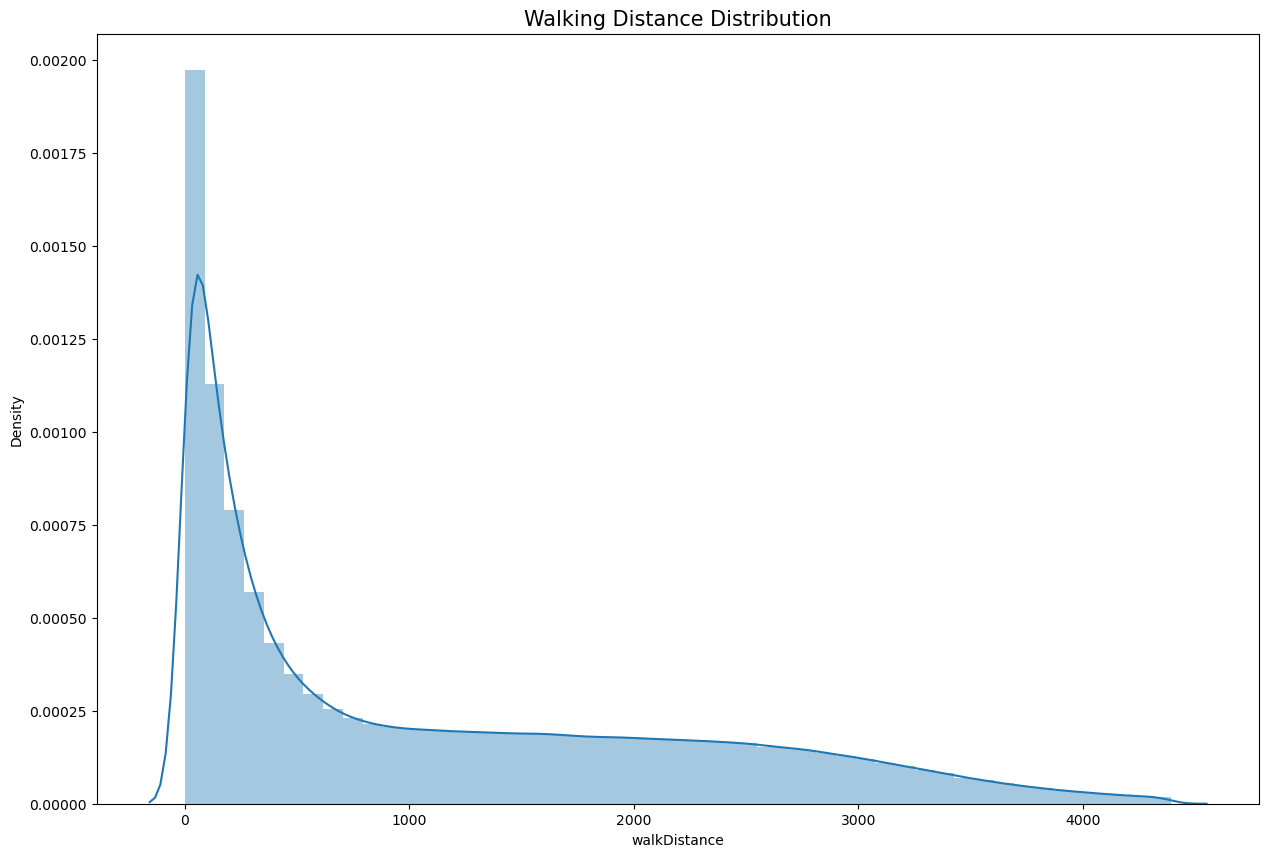

In [89]:
#walking 'Distance Distribution' shown on below graph
data = data.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [90]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(data)))

99603 players (2.0534%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


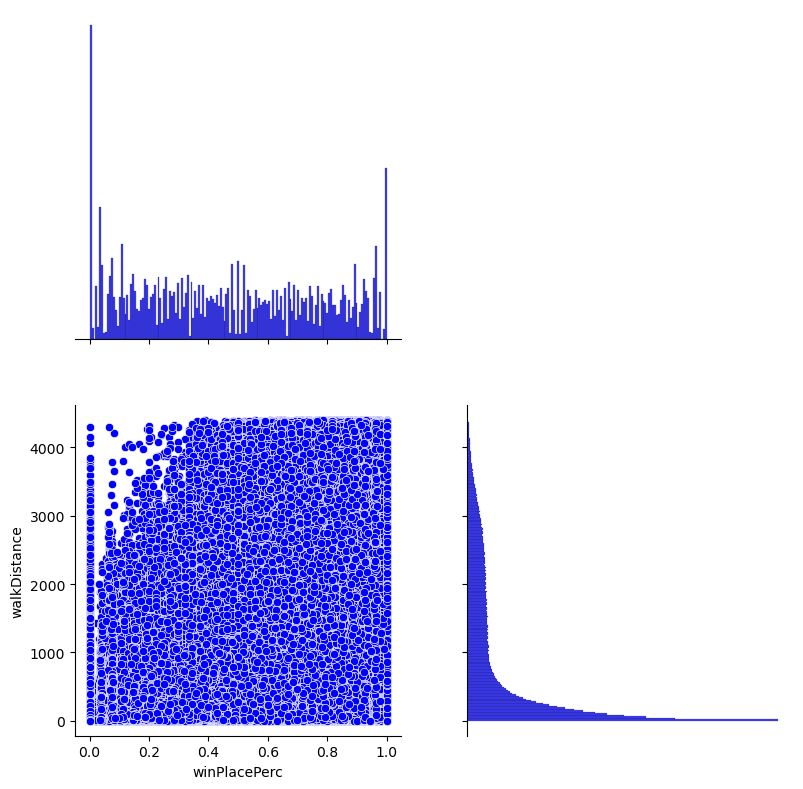

In [92]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=data, height=8, ratio=1, color="b")
plt.show()

- INFERANCE: Apparently walking has a high correlation with winPlacePerc.

# The Drivers

In [93]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(data['rideDistance'].mean(), data['rideDistance'].quantile(0.99), data['rideDistance'].max()))

The average person drives for 601.4m, 99% of people have drived 6970.0m or less, while the formula 1 champion drived for 40710.0m.


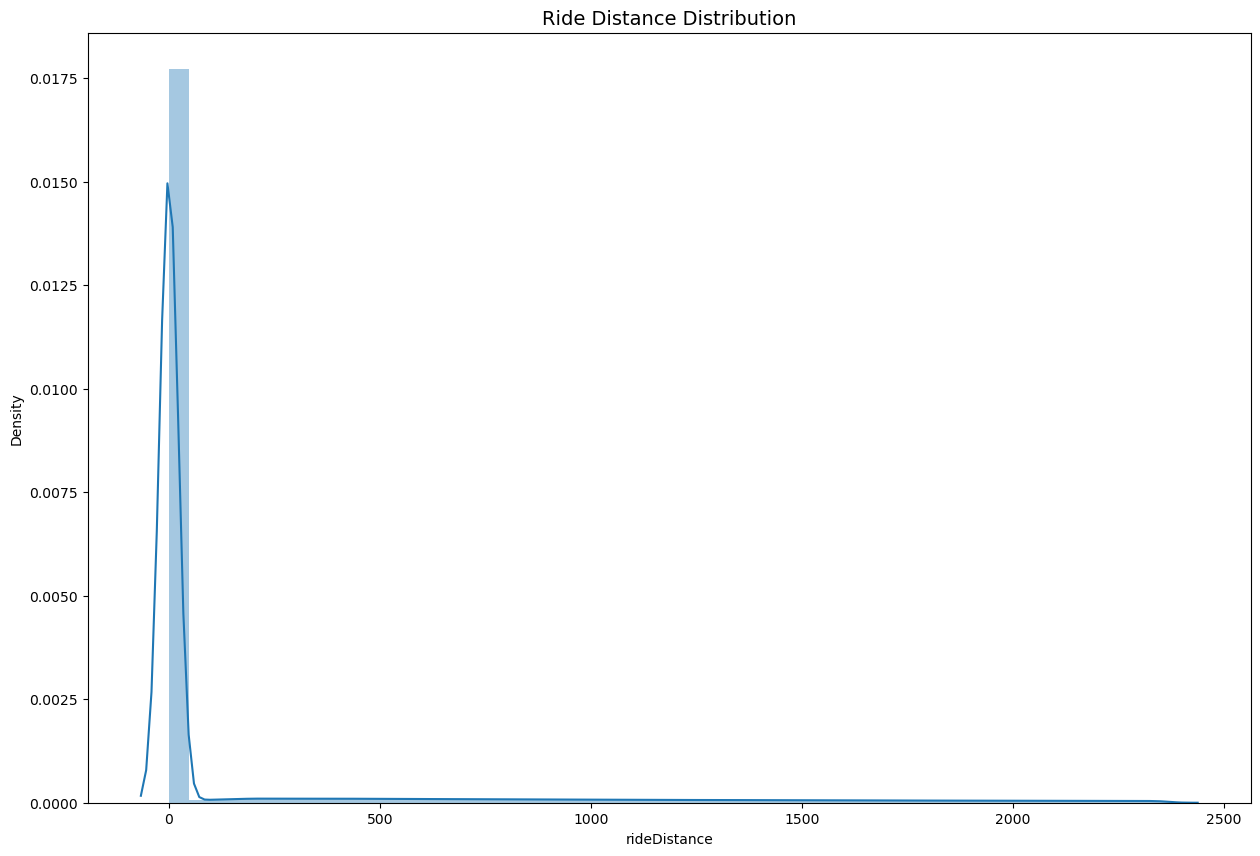

In [94]:
data = data.copy()
data = data[data['rideDistance'] < data['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=14)
sns.distplot(data['rideDistance'])
plt.show()

- INFERANCE: The density of players with RideDistace 0 is high

In [22]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(data)))

1996877 players (45.4354%) drived for 0 meters. This means that they don't have a driving licence yet.


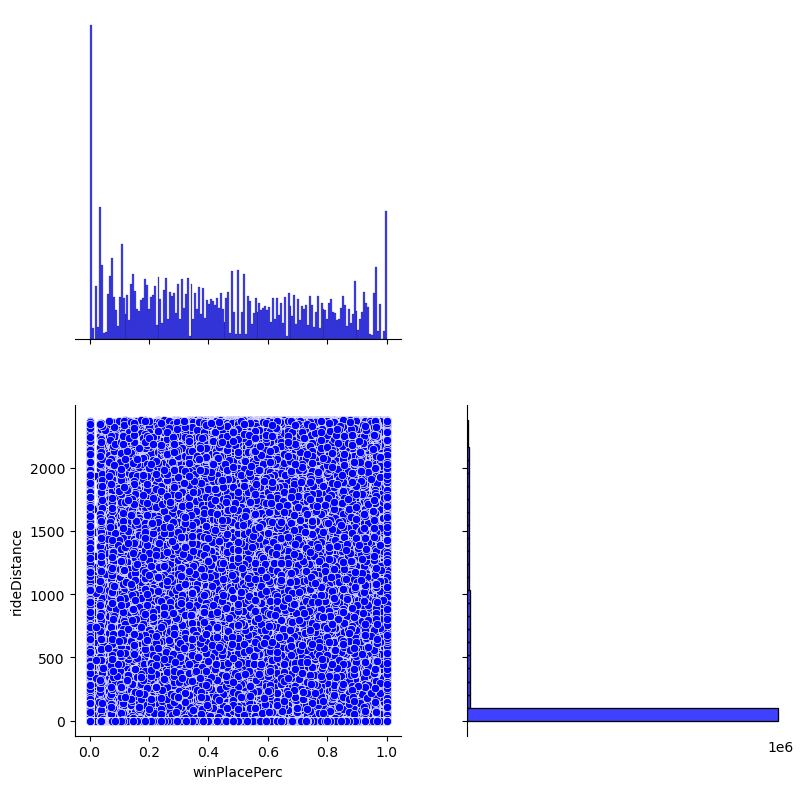

In [96]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=data, height=8, ratio=1, color="b")
plt.show()

INFERENCE: There is a small correlation between rideDistance and winPlacePerc.






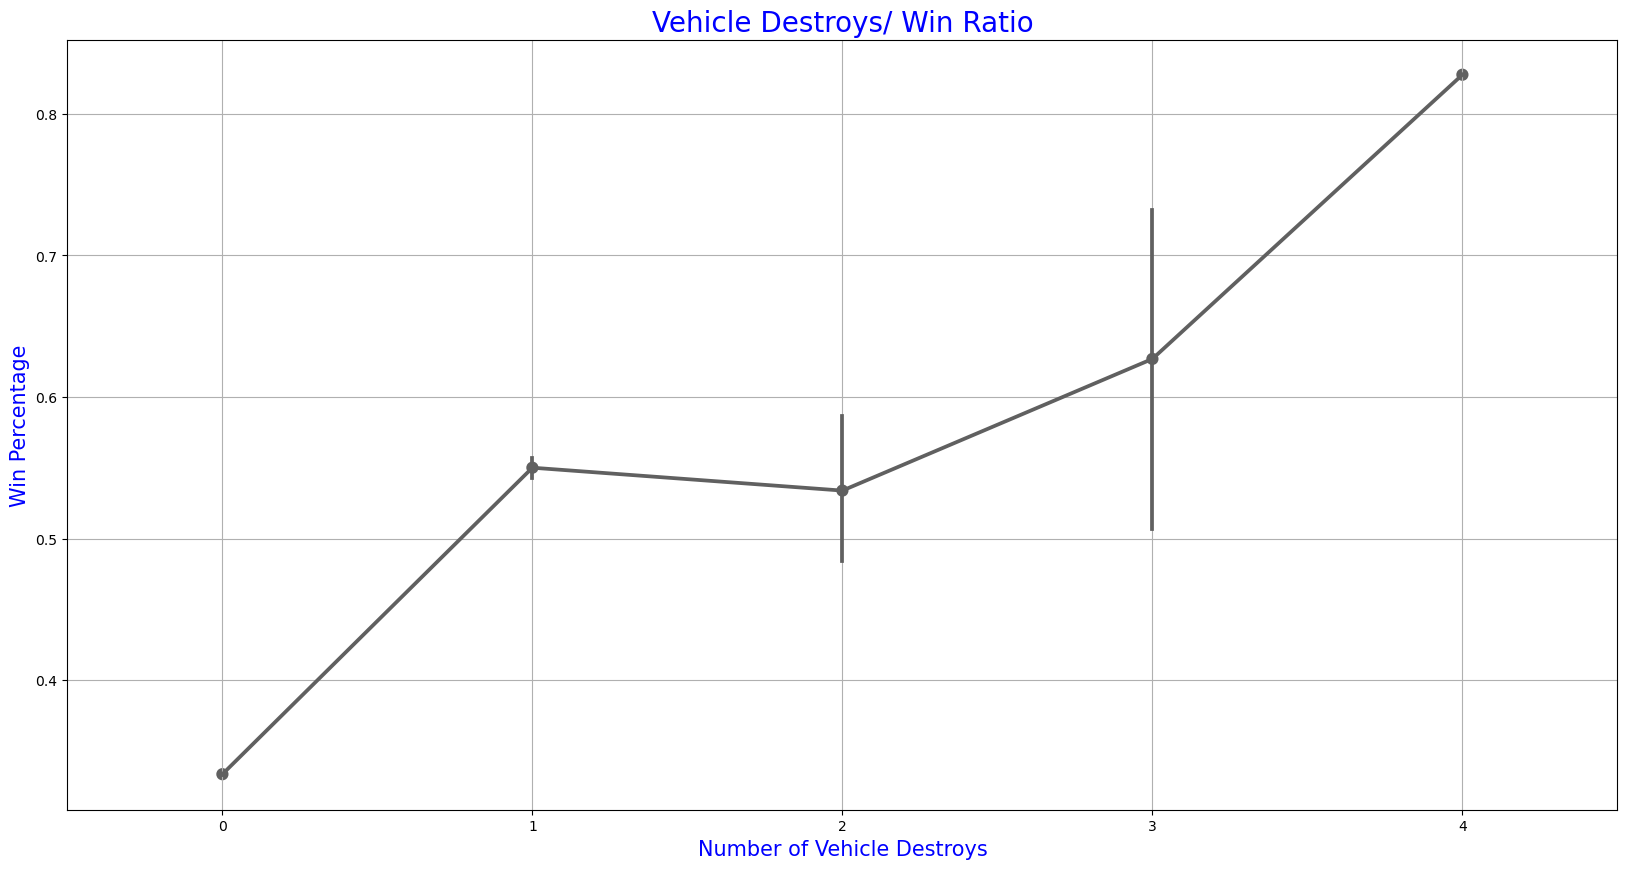

In [24]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

INFERENCE: Destroying a single vehicle increases chances odf winning

# The Healers

In [25]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(data['heals'].mean(),data['heals'].quantile(0.99),data['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(data['boosts'].mean(), data['boosts'].quantile(0.99), data['boosts'].max()))

The average person uses 0.5 heal items, 99% of people use 8.0 or less, while the doctor used 62.
The average person uses 0.4 boost items, 99% of people use 4.0 or less, while the doctor used 28.


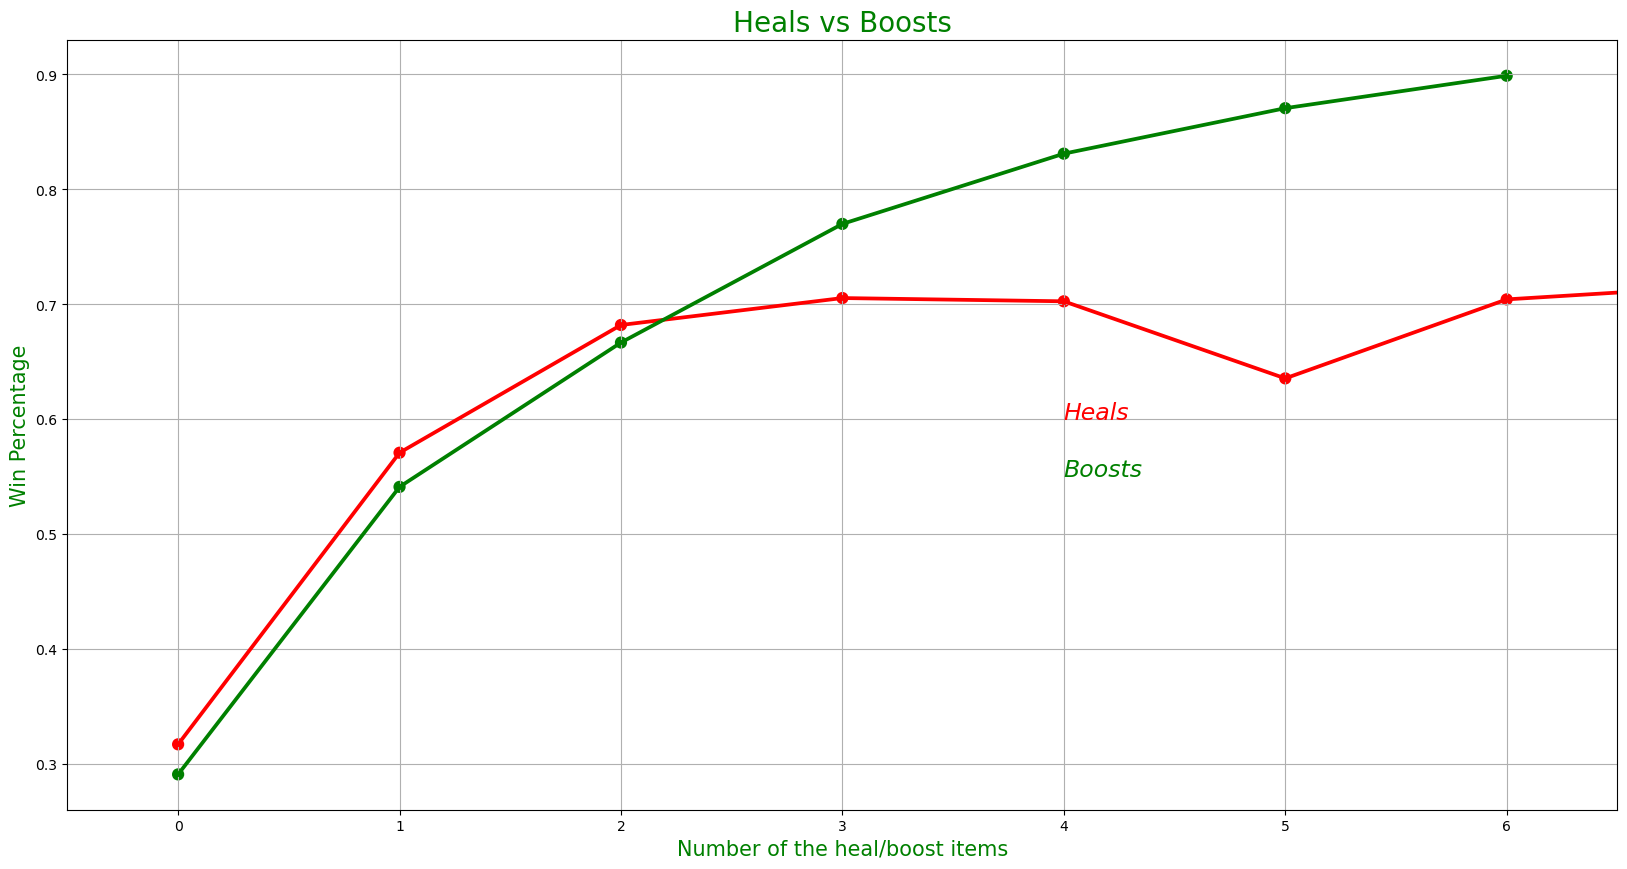

In [97]:
data=data.copy()
data=data[data['heals'] < data['heals'].quantile(0.99)]
data=data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='red',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='green',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize=17,style='italic')
plt.text(4,0.55,'Boosts',color='green',fontsize=17,style='italic')
plt.xlabel('Number of the heal/boost items',fontsize=15,color='green')
plt.ylabel('Win Percentage',fontsize=15,color='green')
plt.title('Heals vs Boosts',fontsize=20,color='green')
plt.grid()
plt.show()


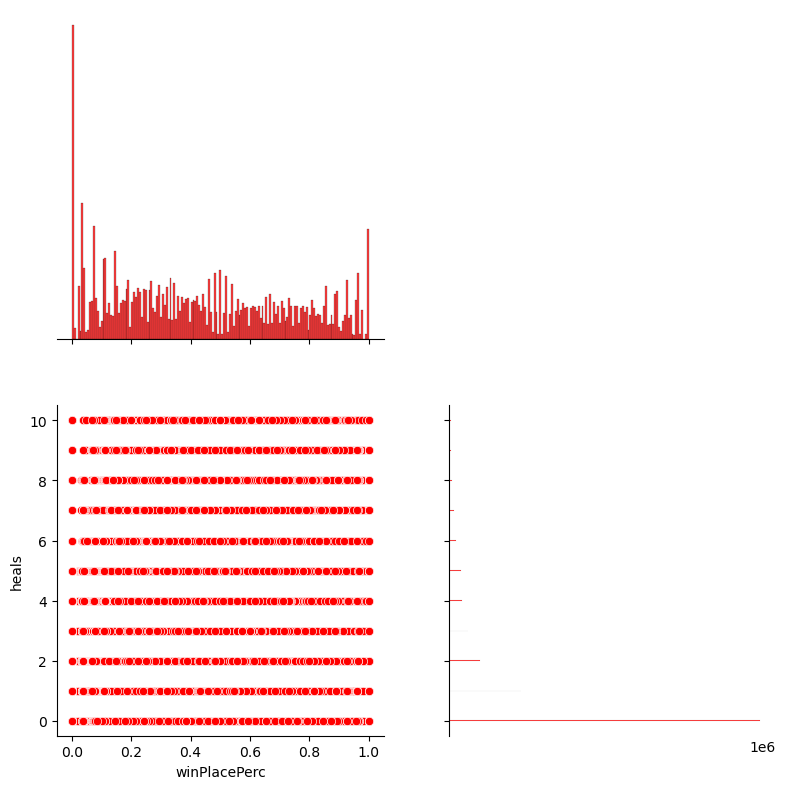

In [100]:
sns.jointplot(x="winPlacePerc", y="heals",data=data, height=8,ratio=1,color='red')
plt.show()

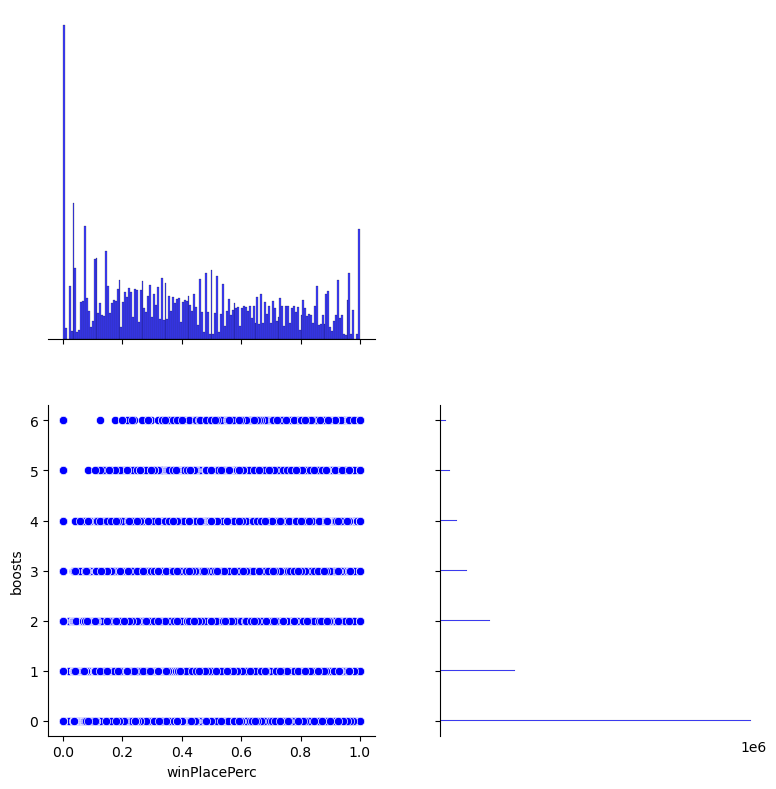

In [101]:
sns.jointplot(x="winPlacePerc", y="boosts",data=data, height=8,ratio=1,color='blue')
plt.show()

- INFERANCE :So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more

- In every plot, there is an abnormal behavior when values are 0.

# The Swimmers

In [102]:
print("The average person swims for {:.1f}m, 99% of people have swimmed {}m or less, while the olympic champion swimmed for {}m.".format(data['swimDistance'].mean(), data['swimDistance'].quantile(0.99), data['swimDistance'].max()))

The average person swims for 3.7m, 99% of people have swimmed 110.69999694824219m or less, while the olympic champion swimmed for 3823.0m.


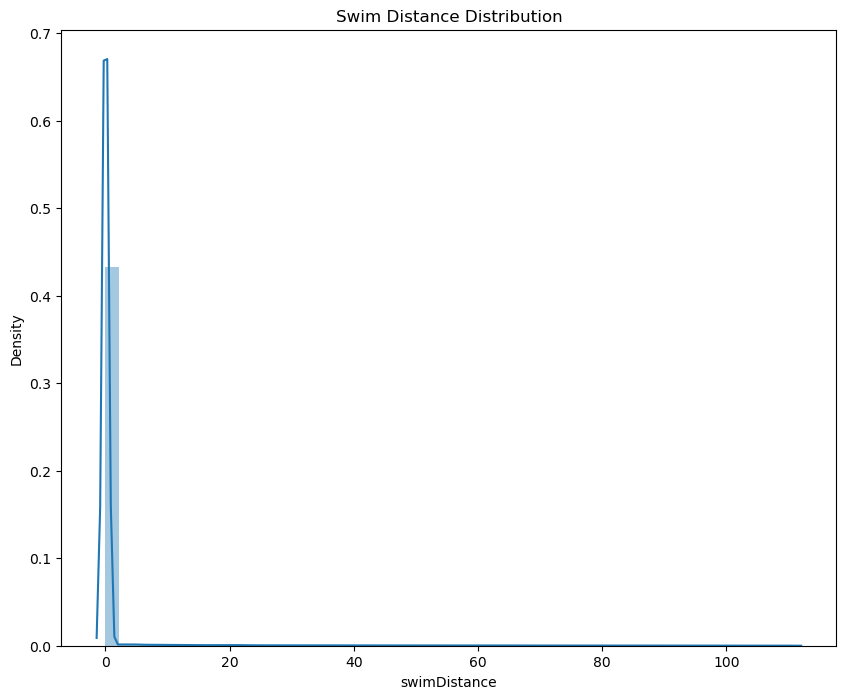

In [103]:
data=data.copy()
data=data[data['swimDistance'] < data['swimDistance'].quantile(0.99)]
plt.figure(figsize=(10,8))
plt.title("Swim Distance Distribution", fontsize=12)
sns.distplot(data['swimDistance'])
plt.show()

- INFERENCE : Almost no one swim. 

# Let's group swimming distances in 4 catogories and plot vs winPlacePerc

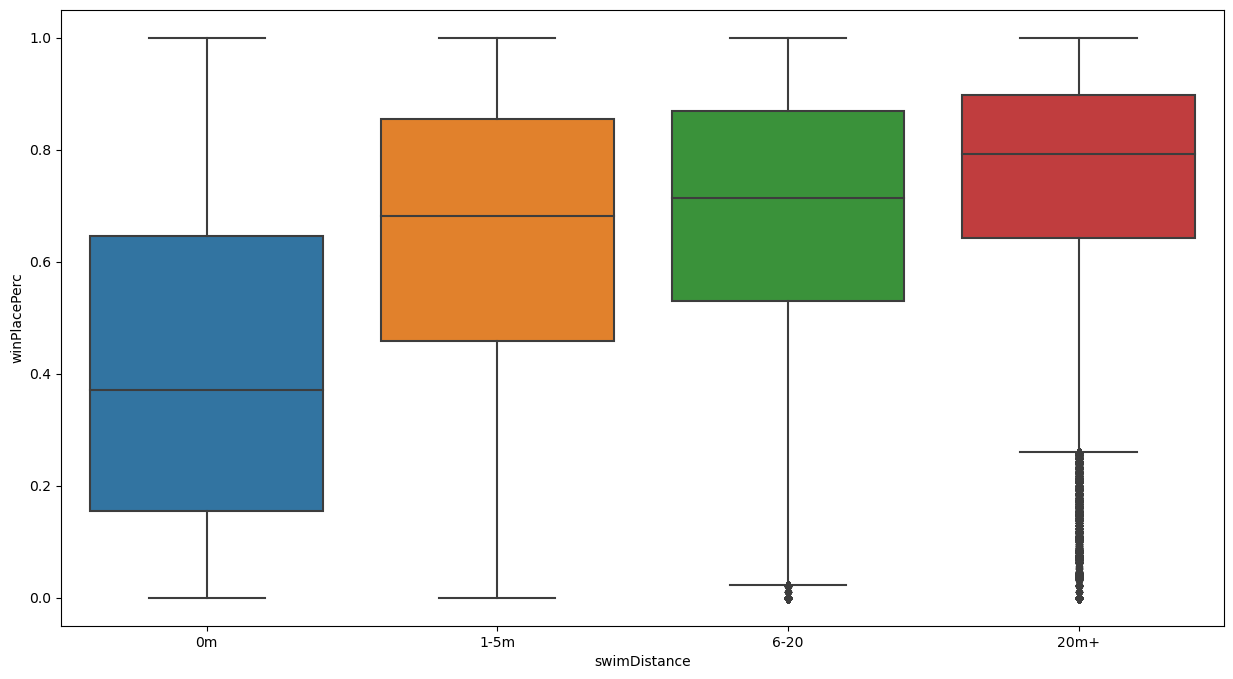

In [104]:
swim=data.copy()

swim['swimDistance']=pd.cut(swim['swimDistance'], [-1,0,5,20,5286],labels=['0m','1-5m','6-20','20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

- INFERANCE: It seems that if  swim,when rise to the top .In PUBG there are currently 3 maps.One of them has almost no water.Keep
    that in mind.I might plan on doing analysis to find out in which map a match is played.

## Solos Duos Squad

- Here we will change three types of games

In [105]:
solos = data[data['numGroups']>50]
duos = data[(data['numGroups']>25) & (data['numGroups']<=50)]
squads = data[data['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(data), len(duos), 100*len(duos)/len(data), len(squads), 100*len(squads)/len(data),))

There are 629138 (16.39%) solo games, 2841533 (74.01%) duo games and 368639 (9.60%) squad games.


## Find the illegal match

In [9]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


#### Where WinPlaceperc is null and we will drop the column because the data is not correct.

In [10]:
data.drop(2744604, inplace=True)

## Normalize the column:

In [11]:
data['killsNormalization'] = data['kills']*((100-data['kills'])/100 + 1)
data['damageDealtNormalization'] = data['damageDealt']*((100-data['damageDealt'])/100 + 1)
 
 
data['maxPlaceNormalization'] = data['maxPlace']*((100-data['maxPlace'])/100 + 1)
 
data['matchDurationNormalization'] = data['matchDuration']*((100-data['matchDuration'])/100 + 1)


## Let’s compare the actual and normalized data:

In [12]:
New_normalized_column = data[['Id','matchDuration','matchDurationNormalization','kills','killsNormalization','maxPlace','maxPlaceNormalization','damageDealt','damageDealtNormalization']]

## Feature Engineering

### Create new features:

In [13]:
data['healsandboostsfeature'] = data['heals'] + data['boosts']
data[['heals', 'boosts', 'healsandboostsfeature']].tail()

,heals,boosts,healsandboostsfeature
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


## Total distance travelled

In [14]:
data["totalDistancetravelled"] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']
data[['rideDistance', 'walkDistance', 'swimDistance','totalDistancetravelled']].tail()

,rideDistance,walkDistance,swimDistance,totalDistancetravelled
4446961,1292.0,1019.000000,0.000,2311.000000
4446962,0.0,81.699997,0.000,81.699997
4446963,0.0,788.700012,2.184,790.884033
4446964,0.0,2748.000000,0.000,2748.000000
4446965,1369.0,1244.000000,0.000,2613.000000


In [15]:
data['headshot_rate'] = data['headshotKills'] / data['kills'].where(data['kills']!=0,1)


In [16]:
data['headshot_rate']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4446965, dtype: float64

### Now we will see the complete description of the catogerical data

In [17]:
categorical_val =[]
continous_val = []
for column in data.columns:
    print("---------------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique())<= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)


---------------------------
Id : ['7f96b2f878858a' 'eef90569b9d03c' '1eaf90ac73de72' ... 'e1948b1295c88a'
 'cc032cdd73b7ac' '0d8e7ed728b6fd']
---------------------------
groupId : ['4d4b580de459be' '684d5656442f9e' '6a4a42c3245a74' ... 'ac3f1b4a56e5ad'
 '408cdb5c46b2ac' '8c74f72fedf5ff']
---------------------------
matchId : ['a10357fd1a4a91' 'aeb375fc57110c' '110163d8bb94ae' ... '7ae14295044ffe'
 '21beed46753ed9' 'fcad6c3fdd847a']
---------------------------
assists : [ 0  1  3  2  4  6  5  8  9  7 13 11 12 21 10 20 14 17 22 15]
---------------------------
boosts : [ 0  1  2  3  4  6  5  9  7  8 11 10 13 14 12 21 15 20 16 17 33 19 18 24
 28 23 22]
---------------------------
damageDealt : [ 0.     91.47   68.     ...  6.828   0.8276  0.8705]
---------------------------
DBNOs : [ 0  1  6  4  3  2  5 10  8  7  9 13 21 12 11 19 32 18 24 22 20 14 15 26
 17 16 25 27 23 33 38 30 29 31 39 35 40 28 53]
---------------------------
headshotKills : [ 0  1  2  3  6  4  5  8  9  7 17 10 14 12 40 1

### Using LabelEncoder convert the categorical column in to numerical column.

In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
column_to_encode=['Id','groupId','matchId','assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills','killStreaks','longestKill','matchDuration','matchType','maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints']
for column in column_to_encode:
    data[column]= label_encoder.fit_transform(data[column])


In [115]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,weaponsAcquired,winPoints,winPlacePerc,killsNormalization,damageDealtNormalization,maxPlaceNormalization,matchDurationNormalization,healsandboostsfeature,totalDistancetravelled,headshot_rate
0,1913045,545502,30084,0,0,0,0,0,0,59,...,1,929,0.4444,0.00,0.000000,48.16,-14444.36,0,244.800003,0.0
1,3583535,735737,32750,0,0,16756,0,0,0,56,...,5,0,0.6400,0.00,99.272392,45.24,-28023.29,0,1445.044556,0.0
2,459040,749753,3143,1,0,14409,0,0,0,46,...,2,0,0.7755,0.00,89.759995,75.00,-14735.24,0,161.800003,0.0
3,1050300,1191456,45258,0,0,10899,0,0,0,74,...,3,0,0.1667,0.00,54.975903,52.39,-17748.96,0,202.699997,0.0
4,739251,1562398,20530,0,0,17609,0,0,0,44,...,2,0,0.1875,1.99,100.000000,99.91,-17429.76,0,49.750000,0.0


In [116]:
data.dtypes

Id                              int32
groupId                         int32
matchId                         int32
assists                         int64
boosts                          int64
damageDealt                     int64
DBNOs                           int64
headshotKills                   int64
heals                           int64
killPlace                       int64
killPoints                      int64
kills                           int64
killStreaks                     int64
longestKill                     int64
matchDuration                   int64
matchType                       int32
maxPlace                        int64
numGroups                       int64
rankPoints                      int64
revives                         int64
rideDistance                    int64
roadKills                       int64
swimDistance                    int64
teamKills                       int64
vehicleDestroys                 int64
walkDistance                    int64
weaponsAcqui

# Correlation

In [18]:
data.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,weaponsAcquired,winPoints,winPlacePerc,killsNormalization,damageDealtNormalization,maxPlaceNormalization,matchDurationNormalization,healsandboostsfeature,totalDistancetravelled,headshot_rate
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.243882,0.024014,0.299441,0.318927,-0.277951,-0.150841,0.015107,0.293930,0.233644,0.099844
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.406609,-0.007645,0.634234,0.506195,-0.260453,-0.014464,-0.071780,0.812341,0.574247,0.184054
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.353248,0.017762,0.440507,0.888290,-0.672239,-0.044889,0.002682,0.467722,0.313074,0.299013
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,...,0.218161,0.011108,0.279970,0.710838,-0.449781,-0.260494,0.013579,0.342091,0.224934,0.246963
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,...,0.217552,0.004982,0.277722,0.671984,-0.481367,0.003670,0.014950,0.286080,0.188960,0.732312
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.309071,-0.010990,0.427857,0.314456,-0.165222,-0.065011,-0.109803,0.927683,0.438538,0.122269
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,...,-0.490144,-0.002415,-0.719069,-0.740970,0.250019,0.021167,0.007663,-0.512001,-0.483337,-0.387213
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,...,-0.003978,0.983417,0.012908,0.036540,-0.019325,-0.047954,0.100011,0.001906,-0.017674,0.014815
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,...,0.336414,0.006929,0.419916,0.999409,-0.636489,-0.010889,0.026160,0.437357,0.282473,0.323878
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,...,0.275373,0.008552,0.377566,0.811579,-0.314395,-0.033596,0.032524,0.366021,0.245649,0.398229


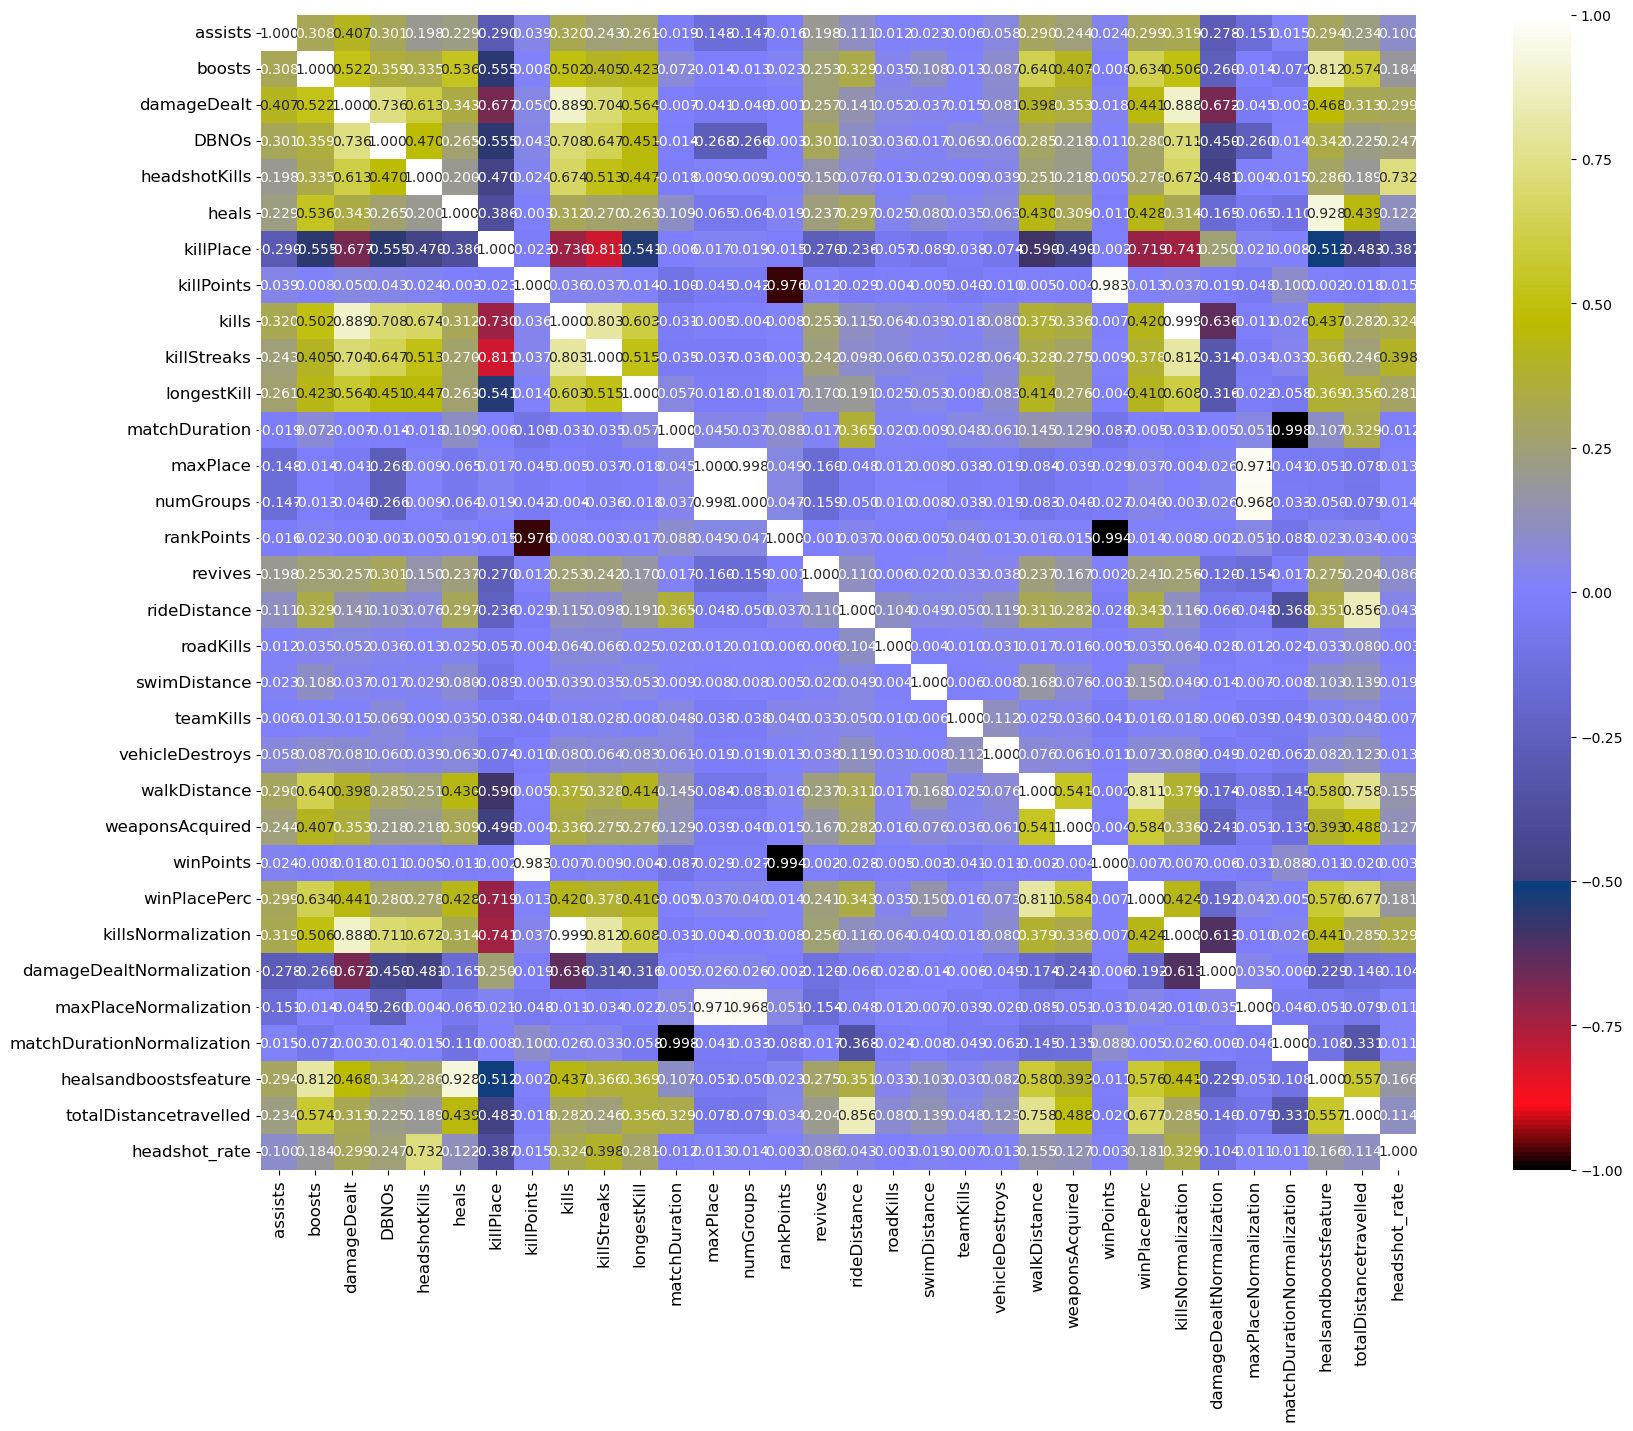

In [19]:
# Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Splitting the Data

In [117]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [118]:
x=data.drop(['killsNormalization', 'damageDealtNormalization','maxPlaceNormalization', 'matchDurationNormalization','healsandboostsfeature','totalDistancetravelled'],axis=1)
#drop the target variable
y=data['winPlacePerc']
 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=7)

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Scaling the data using Standard Scaler

## Creating a confusion matrix

In [120]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm



# Machine learning model building 

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

## Linear Regression

In [122]:
lnr = LinearRegression() 
lnr_model = lnr.fit(x_train,y_train)
lnr.score(x_train,y_train)
y_pred = lnr.predict(x_test)
y_pred_train = lnr.predict(x_train)
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

Mean squarred error : 5.685394303522517e-30
Mean absolute error : 1.651824054162435e-15
R2 score : 1.0


In [123]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lnr_model,x,y,cv=3)
print('Mean CV Score :',score.mean())

Mean CV Score : 1.0


## Random Forest Regressor

In [124]:
rf=RandomForestRegressor()
rf_model=rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

Mean squarred error : 1.0936934403238571e-11
Mean absolute error : 8.171495774871602e-08
R2 score : 0.9999999998755933


## Decision Tree Regressor

In [53]:
dt=DecisionTreeRegressor()
dt_model=dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

Mean squarred error : 5.2642082528395e-11
Mean absolute error : 1.246369992121594e-07
R2 score : 0.9999999992102243


##  AdaBoostRegressor

In [54]:
adb=AdaBoostRegressor()
adb_model=adb.fit(x_train,y_train)
adb.score(x_train,y_train)
y_pred = adb.predict(x_test)
y_pred_train = adb.predict(x_train)
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

Mean squarred error : 0.0003691924669631231
Mean absolute error : 0.015623273074867184
R2 score : 0.9944611002866278


## ExtraTreesRegressor

In [55]:
et=ExtraTreesRegressor()
et_model=et.fit(x_train,y_train)
et.score(x_train,y_train)
y_pred = et.predict(x_test)
y_pred_train = et.predict(x_train)
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

Mean squarred error : 5.099446147977336e-09
Mean absolute error : 7.739103857646741e-07
R2 score : 0.9999999234943198


## Cross Validation

In [56]:
models=[rf_model,dt_model,adb_model,et_model]
for m in models:
    score = cross_val_score(m,x,y,cv=5)
    print('\n')
    print('Cross validation score :',m)
    print('Mean CV Score :',score.mean())
    print('\n')
    print('================================')



Cross validation score : RandomForestRegressor()
Mean CV Score : 0.9999999992144313




Cross validation score : DecisionTreeRegressor()
Mean CV Score : 0.9999999993097312




Cross validation score : AdaBoostRegressor()
Mean CV Score : 0.9932646198231281




Cross validation score : ExtraTreesRegressor()
Mean CV Score : 0.9999999674451596




## Train Accuracy of linear Regression model

In [58]:
train_accuracy=lnr_model.score(x_train,y_train)
test_accuracy=lnr_model.score(x_test,y_test)
print('Training Model Accuracy:',train_accuracy)
print('Test Model Accuracy:',test_accuracy)

Training Model Accuracy: 1.0
Test Model Accuracy: 1.0


## Train Accuracy of RandomForestRegressor

In [59]:
train_accuracy=rf_model.score(x_train,y_train)
test_accuracy=rf_model.score(x_test,y_test)
print('Training Model Accuracy:',train_accuracy)
print('Test Model Accuracy:',test_accuracy)

Training Model Accuracy: 0.9999999998737908
Test Model Accuracy: 0.9999999996140074


## Train Accuracy of DecisionTree

In [60]:
train_accuracy=dt_model.score(x_train,y_train)
test_accuracy=dt_model.score(x_test,y_test)
print('Training Model Accuracy:',train_accuracy)
print('Test Model Accuracy:',test_accuracy)

Training Model Accuracy: 1.0
Test Model Accuracy: 0.9999999992102243


## Train Accuracy of AdaBoostRegressor

In [61]:
train_accuracy=adb_model.score(x_train,y_train)
test_accuracy=adb_model.score(x_test,y_test)
print('Training Model Accuracy:',train_accuracy)
print('Test Model Accuracy:',test_accuracy)

Training Model Accuracy: 0.9944694721041857
Test Model Accuracy: 0.9944611002866278


## Train Accuracy of ExtraTreesRegressor

In [62]:
train_accuracy=et_model.score(x_train,y_train)
test_accuracy=et_model.score(x_test,y_test)
print('Training Model Accuracy:',train_accuracy)
print('Test Model Accuracy:',test_accuracy)

Training Model Accuracy: 1.0
Test Model Accuracy: 0.9999999234943198


- INFERENCE: Since The Test Accuracy Of The Models Are 99% The Train Accuracy Should Be More Than The Value Of Test Accuracy

In [66]:
#Installing prettytable to visually represent the train accuracy,test accuracy and cv score of the models used.
!pip install prettytable
from prettytable import PrettyTable

In [68]:
pt=PrettyTable()
pt.field_names=['Model','Train Accuracy','Test Accuracy','cv score']
pt.add_row(['RandomForestRegressor','0.9999999998509715','0.9999999996130994','0.9999999992144313'])
pt.add_row(['DecisionTreeRegressor','1.0','0.9999999993280844',' 0.9999999993097312'])
pt.add_row(['AdaBoostRegressor','0.9938993528699396',' 0.9938850843790722','0.9932646198231281'])
pt.add_row(['ExtraTreesRegressor','1.0','0.9999999296587604','0.9999999674451596'])


print(pt)

+-----------------------+--------------------+---------------------+---------------------+
|         Model         |   Train Accuracy   |    Test Accuracy    |       cv score      |
+-----------------------+--------------------+---------------------+---------------------+
| RandomForestRegressor | 0.9999999998509715 |  0.9999999996130994 |  0.9999999992144313 |
| DecisionTreeRegressor |        1.0         |  0.9999999993280844 |  0.9999999993097312 |
|   AdaBoostRegressor   | 0.9938993528699396 |  0.9938850843790722 |  0.9932646198231281 |
|  ExtraTreesRegressor  |        1.0         |  0.9999999296587604 |  0.9999999674451596 |
+-----------------------+--------------------+---------------------+---------------------+


#### INFERENCE: Here we can see that the train accuracy is higher than test accuracy and our model is accurate
          

# Conclusion

#### - We have used 4 Regressor Models to conduct our prediction.
##### - We have succesfully created a predictive model and predicted the win probability of a Pubg match.
#### - We have a complete data analysis report on the given data.